In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [80]:
## reading the training data into the program
train = pd.read_csv('/Users/cerser5/House_Project/house-prices-advanced-regression-techniques/train.csv')
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [81]:
## Dropping the ID column from the data
train = train.drop('Id', axis = 1)
train.head(1)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500


In [19]:
#showing types of columns
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [20]:
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [21]:
#Cleaning Data

In [82]:
# Find columns with missing values and their percent missing
train.isnull().sum()                                                     
miss_val = train.isnull().sum().sort_values(ascending=False)
miss_val = pd.DataFrame(data=train.isnull().sum().sort_values(ascending=False), columns=['MissingCount'])

# Add a new column to the dataframe and fill it with the percentage of missing values
miss_val['Percent'] = miss_val.MissingCount.apply(lambda x : '{:.2f}'.format(float(x)/train.shape[0] * 100)) 
miss_val = miss_val[miss_val.MissingCount > 0]
miss_val

,MissingCount,Percent
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageYrBlt,81,5.55
GarageCond,81,5.55
GarageType,81,5.55
GarageFinish,81,5.55


In [83]:
# Dropping columns with significant amount of missing data
train = train.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis = 1)
train.shape

(1460, 75)

In [84]:
train['LotFrontage'].fillna(train['LotFrontage'].mean(), inplace=True)

In [85]:
# Calculate the percentage of rows with missing values
percentage_missing = (train.isnull().sum(axis=1) / train.shape[1]) * 100

# Filter rows with missing values
rows_with_missing = train[percentage_missing > 10]

# Calculate the percentage of data that would be deleted
percentage_deleted = (len(rows_with_missing) / len(train)) * 100

print(f"Percentage of data to be deleted: {percentage_deleted:.2f}%")

Percentage of data to be deleted: 0.48%


In [86]:
train.dropna(inplace = True)
train.shape

(1338, 75)

In [42]:
miss_val = miss_val[~miss_val.index.isin(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'])]
columns_with_missing_values = miss_val.index

# Iterates over each column with missing values
for column in columns_with_missing_values:
    # Get the unique values in the current column
    unique_values = train[column].unique()
    
    # Print the column name and its unique values
    print(f"Column: {column}")
    print("Unique Values:")
    print(unique_values)
    print()  # Added a blank line for readability

Column: LotFrontage
Unique Values:
[ 65.          80.          68.          60.          84.
  85.          75.          70.04995837  51.          50.
  70.          91.          66.         101.          57.
  44.         110.          98.          47.         108.
 112.          74.         115.          61.          48.
  52.         100.          24.          89.          63.
  76.          72.          81.          95.          69.
  21.          32.          78.         121.         122.
  40.          73.          77.          94.         105.
  34.          90.          55.          88.          82.
  71.         120.         107.          92.         134.
  86.          62.         141.          97.          54.
  64.          41.          79.         174.          99.
  83.          43.         103.          93.          30.
 129.         140.          35.          37.         118.
  87.         116.         150.         111.          49.
  96.          59.          36.      

In [87]:
# Picking specific columns im interested in seeing the correlation with the target variable
coi = ['1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice']
# Calculate the correlation matrix
correlation_matrix = train[coi].corr()

# Display the correlation matrix
print(correlation_matrix)

             1stFlrSF  2ndFlrSF  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
1stFlrSF     1.000000 -0.220279    0.450366    0.094065   0.318097   
2ndFlrSF    -0.220279  1.000000   -0.151876   -0.109254  -0.016117   
BsmtFinSF1   0.450366 -0.151876    1.000000   -0.064855  -0.552809   
BsmtFinSF2   0.094065 -0.109254   -0.064855    1.000000  -0.233449   
BsmtUnfSF    0.318097 -0.016117   -0.552809   -0.233449   1.000000   
TotalBsmtSF  0.893110 -0.234070    0.505000    0.083184   0.363767   
GarageArea   0.500071  0.124564    0.284095   -0.053411   0.195401   
WoodDeckSF   0.233200  0.081291    0.187178    0.061206  -0.020711   
OpenPorchSF  0.226615  0.202791    0.107561    0.004211   0.122171   
SalePrice    0.604714  0.311354    0.359677   -0.031226   0.191689   

             TotalBsmtSF  GarageArea  WoodDeckSF  OpenPorchSF  SalePrice  
1stFlrSF        0.893110    0.500071    0.233200     0.226615   0.604714  
2ndFlrSF       -0.234070    0.124564    0.081291     0.202791   0.311354  
Bsmt

In [91]:
corr = train.corr()
corr["SalePrice"].sort_values(ascending=False).head(10)

/var/folders/8z/scpggshn6xnf6ktckbg7l7mm0000gn/T/ipykernel_30504/994387007.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train.corr()


SalePrice       1.000000
OverallQual     0.807486
GrLivArea       0.704739
GarageCars      0.660141
GarageArea      0.612695
FullBath        0.612604
1stFlrSF        0.599786
TotalBsmtSF     0.589521
YearBuilt       0.572592
YearRemodAdd    0.565870
Name: SalePrice, dtype: float64

In [51]:
# Identify categorical and numerical columns
categorical_columns = train.select_dtypes(include=['object']).columns
numerical_columns = train.select_dtypes(include=['number']).columns

# Handle categorical data
for column in categorical_columns:
    if train[column].isnull().any():
        train[column].fillna('Missing', inplace=True)

# Handle numerical data
for column in numerical_columns:
    if train[column].isnull().any():
        mean_value = train[column].mean()
        train[column].fillna(mean_value, inplace=True)

In [47]:
# Getting only data with numbers
train_num = train.select_dtypes(include = ['int64', 'float64'])
train_num.head(5)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [ ]:
print(train_num['SalePrice'].describe())

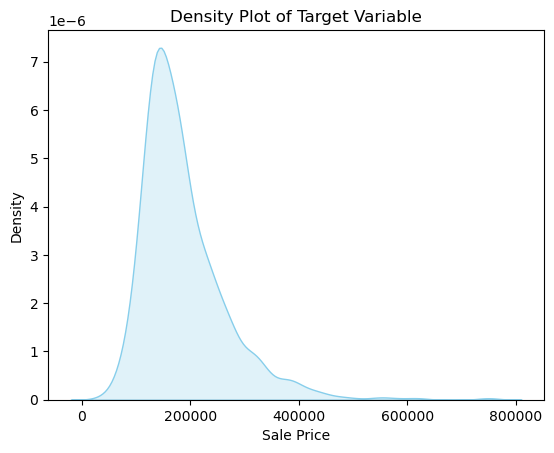

In [48]:
# Density Plot to see the spread of the Sale Price
sns.kdeplot(train_num['SalePrice'], fill=True, color='skyblue')
plt.xlabel('Sale Price')
plt.ylabel('Density')
plt.title('Density Plot of Target Variable')
plt.show()

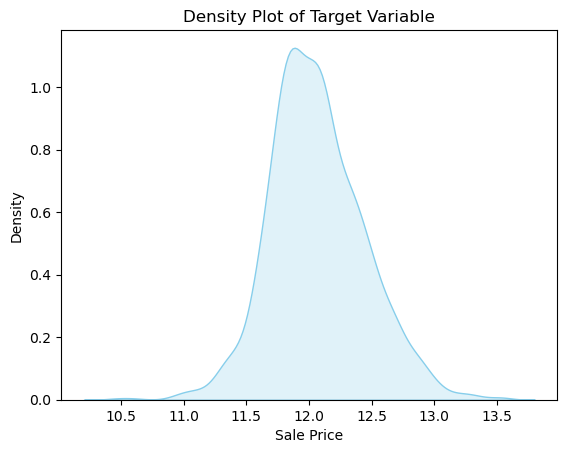

In [90]:
train['SalePrice'] = np.log1p(train['SalePrice'])

# Density Plot to see the spread of the Sale Price after normalization
sns.kdeplot(train['SalePrice'], fill=True, color='skyblue')
plt.xlabel('Sale Price')
plt.ylabel('Density')
plt.title('Density Plot of Target Variable')
plt.show()

In [94]:
from scipy.stats import skew

#Top skewed columns
numeric_features = train.dtypes[train.dtypes != 'object'].index
skewed_features = train[numeric_features].apply(lambda x: skew(x)).sort_values(ascending=False)
high_skew = skewed_features[abs(skewed_features) > 0.5]
print(high_skew)

MiscVal          24.604954
PoolArea         14.171921
LotArea          11.924736
LowQualFinSF     10.554965
3SsnPorch        10.085230
KitchenAbvGr      5.936896
BsmtFinSF2        4.141869
ScreenPorch       3.912455
BsmtHalfBath      3.843594
EnclosedPorch     3.201692
MasVnrArea        2.579788
LotFrontage       2.476736
OpenPorchSF       2.248428
TotalBsmtSF       2.211546
BsmtFinSF1        1.691498
WoodDeckSF        1.480078
GrLivArea         1.428703
1stFlrSF          1.395864
MSSubClass        1.390340
BsmtUnfSF         0.934314
OverallCond       0.896535
GarageArea        0.806173
2ndFlrSF          0.768284
TotRmsAbvGrd      0.672609
Fireplaces        0.570198
HalfBath          0.553392
YearRemodAdd     -0.562713
GarageYrBlt      -0.668706
YearBuilt        -0.677206
dtype: float64


In [96]:
#Transforming skewed columns
for feature in high_skew.index:
    train[feature] = np.log1p(train[feature])

In [ ]:
## plotting the numerical data
train_num.hist(figsize = (16,18), bins = 50, xlabelsize = 10, ylabelsize = 10)

In [101]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Create a label encoder object
label_encoder = LabelEncoder()

# Encode the entire dataset
encoded_df = train.copy()  # Assuming train_df is your DataFrame
for column in categorical_columns:
    encoded_df[column] = label_encoder.fit_transform(encoded_df[column])

# Split the encoded dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(encoded_df.drop(columns=['SalePrice']), 
                                                    encoded_df['SalePrice'], 
                                                    test_size=0.2, 
                                                    random_state=42)

print("Number of examples in training set:", len(X_train))
print("Number of examples in testing set:", len(X_test))

Number of examples in training set: 1070
Number of examples in testing set: 268


In [54]:
#from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target variable (y) 
#X = train.drop(columns=['SalePrice'])  
#y = train['SalePrice']

# Split the dataset into training and testing sets (by default, 75% training and 25% testing)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Optionally, you can convert them back to DataFrames if needed
#train_df = pd.concat([X_train, y_train], axis=1)
#test_df = pd.concat([X_test, y_test], axis=1)

#print("Number of examples in training set:", len(X_train))
#print("Number of examples in testing set:", len(X_test))

Number of examples in training set: 1070
Number of examples in testing set: 268


In [ ]:
# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize a Random Forest classifier
#rf_classifier = RandomForestClassifier()

# Fit the classifier to the training data
#rf_classifier.fit(X_train, y_train)

# Get feature importances
#feature_importances = rf_classifier.feature_importances_

# Sort feature importances in descending order
#indices = np.argsort(feature_importances)[::-1]

# Print feature ranking
#print("Feature ranking:")
#for i, idx in enumerate(indices):
    #print(f"{i + 1}. Feature {idx}: {feature_importances[idx]}")

# Plot feature importances
#import matplotlib.pyplot as plt

#plt.figure()
#plt.title("Feature Importances")
#plt.bar(range(X_train.shape[1]), feature_importances[indices],
       #color="r", align="center")
#plt.xticks(range(X_train.shape[1]), indices)
#plt.xlim([-1, X_train.shape[1]])
#plt.show()


Feature ranking:
1. Feature 15: 0.5133138398518027
2. Feature 44: 0.13781430443118176
3. Feature 58: 0.0425278307665689
4. Feature 36: 0.04200065587104321
5. Feature 41: 0.03465488289424491
6. Feature 59: 0.022234698925428755
7. Feature 17: 0.02158812637960937
8. Feature 32: 0.016972066805124468
9. Feature 18: 0.013848491711129257
10. Feature 3: 0.012544745710420706
11. Feature 55: 0.010546012558181361
12. Feature 1: 0.009571659393676197
13. Feature 28: 0.008947027227819935
14. Feature 2: 0.008384410003505009
15. Feature 42: 0.006611729613367189
16. Feature 16: 0.006058869646523104
17. Feature 10: 0.005698819546590351
18. Feature 54: 0.005441562783093734
19. Feature 24: 0.005038609817063595
20. Feature 35: 0.005032243216184029
21. Feature 63: 0.004572643556341081
22. Feature 56: 0.004191968279127212
23. Feature 70: 0.004057321425982529
24. Feature 57: 0.003982458408905492
25. Feature 52: 0.003741172113275557
26. Feature 51: 0.0034762075570300226
27. Feature 64: 0.003353338342306256
28.

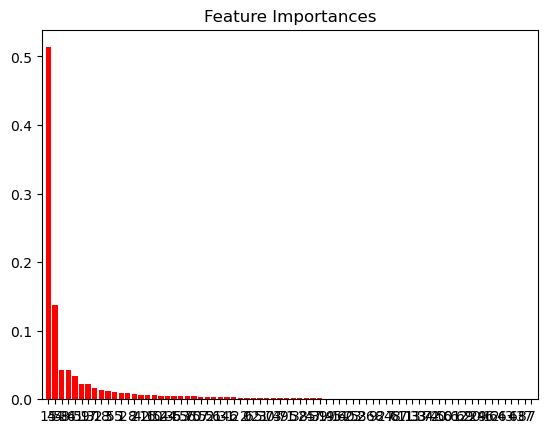

In [102]:
from sklearn.ensemble import RandomForestRegressor

# Initialize a Random Forest regressor
rf_regressor = RandomForestRegressor()

# Fit the regressor to the training data
rf_regressor.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_regressor.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Print feature ranking
print("Feature ranking:")
for i, idx in enumerate(indices):
    print(f"{i + 1}. Feature {idx}: {feature_importances[idx]}")

# Plot feature importances
import matplotlib.pyplot as plt

plt.figure()
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), feature_importances[indices],
       color="r", align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [ ]:
# Random Forest Testing

In [103]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Select features based on top importance
selected_features = [15, 44, 58, 36, 41, 59, 17, 32, 18, 3]

# Prepare data
X_train_selected = X_train.iloc[:, selected_features]
X_test_selected = X_test.iloc[:, selected_features]

# Initialize and train the model
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train_selected, y_train)

# Make predictions
predictions = rf_regressor.predict(X_test_selected)

# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 0.10169533867660266


In [104]:
from sklearn.metrics import mean_squared_error

# Make predictions
predictions = rf_regressor.predict(X_test_selected)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.025332312359278686


In [108]:
np.expm1(predictions)

array([222328.52033949, 172297.00726903, 132413.8286682 , 149738.6609729 ,
       180334.30333978, 139594.41202276, 163529.39859032, 221154.62544077,
       252475.14911782, 150910.90191013, 173074.87479975, 313289.48252078,
       181860.62112403, 157990.26881916, 133239.93569791, 194934.53137285,
       109703.20301202, 151071.94937632, 195381.32229681,  91866.62859858,
       197159.15191668, 164073.89656483, 152642.63226689, 240858.35148815,
       253324.92646081, 148965.93404195, 181817.58767123, 187236.58198493,
       242481.0394111 , 150068.97013998, 254176.159127  , 163338.5233201 ,
       252597.82566992, 180085.79302952, 286011.95288144, 190293.93549635,
       196955.01191946,  98251.30070454, 161515.47836522, 115506.77979492,
       144667.0336355 , 268173.08218752, 245561.9661821 , 174520.61929062,
       179530.5049742 , 243497.95022632, 121549.39875034, 142269.60681768,
       108024.21899288, 141869.51160493, 135267.07092821, 225872.77065094,
       129209.33870345, 2

In [110]:
# Reverse the normalization for both actual and predicted sale prices
actual_prices = np.expm1(y_test)
predicted_prices = np.expm1(predictions)

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({'Actual_SalePrice': actual_prices, 'Predicted_SalePrice': predicted_prices})
print(comparison_df)

      Actual_SalePrice  Predicted_SalePrice
832           237000.0        222328.520339
965           178900.0        172297.007269
969           140000.0        132413.828668
1411          140000.0        149738.660973
284           179200.0        180334.303340
...                ...                  ...
119           163990.0        173220.249062
628           135000.0        192017.642821
585           369900.0        329336.377189
593           140000.0        145365.680741
918           238000.0        248573.474309

[268 rows x 2 columns]
